# Sentiment Analysis on Business(Employee Reviews)

In [55]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

### Load Data

In [56]:
import pandas as pd
df=pd.read_csv(r'C:\Users\HP\Downloads\movies\sentiment business\employee_reviews.csv', encoding='latin1')
df


,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67524,67525,microsoft,none,"Dec 16, 2010",Former Employee - Anonymous Employee,Enriching experience for a beginner but bad fo...,"-Access to a wide range of technologies, compl...",-Testers(SDET's ) do not get as many opportuni...,Make the company leaner and Meaner. (which wou...,3,3,none,4,4,2,0,https://www.glassdoor.com/Reviews/Microsoft-Re...
67525,67526,microsoft,none,"Dec 16, 2010",Current Employee - Senior Marketing Manager,A complex and interesting experience,- Once you're at Microsoft you can change role...,=- be prepared to be Flexible - Frequent chang...,none,3,1.5,none,2.5,4,2.5,0,https://www.glassdoor.com/Reviews/Microsoft-Re...
67526,67527,microsoft,none,"Dec 15, 2010",Current Employee - Account Manager,Good Place to Work,Nice place to work. Good atmosphere with advan...,Management confusion at times with vision for ...,none,4,3,none,4,4.5,3.5,0,https://www.glassdoor.com/Reviews/Microsoft-Re...
67527,67528,microsoft,none,"Dec 15, 2010",Current Employee - Senior Test Lead,"It's a competitive work place, with overload w...","Smart people around you, can learn from them","Politics, weak moral, leaning loyalty",none,3,2,none,3,3.5,3,0,https://www.glassdoor.com/Reviews/Microsoft-Re...


In [57]:

df.drop([	'Unnamed: 0'	,'company',	'location',	'dates',	'job-title'	,	'pros'	,'cons',	'advice-to-mgmt',	'work-balance-stars',	'culture-values-stars',	'carrer-opportunities-stars','comp-benefit-stars',	'senior-mangemnet-stars',	'helpful-count','link'],axis=1,inplace=True)
df
     

,summary,overall-ratings
0,Best Company to work for,5
1,"Moving at the speed of light, burn out is inev...",4
2,Great balance between big-company security and...,5
3,The best place I've worked and also the most d...,5
4,"Unique, one of a kind dream job",5
...,...,...
67524,Enriching experience for a beginner but bad fo...,3
67525,A complex and interesting experience,3
67526,Good Place to Work,4
67527,"It's a competitive work place, with overload w...",3


In [58]:
# Rename the column
df = df.rename(columns={'overall-ratings': 'ratings'})

In [59]:
# check the null values
df.isnull().sum()

summary    127
ratings      0
dtype: int64

In [60]:
# drop the null values
df.dropna(inplace=True, axis=0)

In [61]:

# Convert Score to sentiment label
def label_sentiment(score):
    if score >=4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['ratings'].apply(label_sentiment)


In [62]:
# target column 
df[['ratings', 'Sentiment']].sample(5)

,ratings,Sentiment
63365,5,Positive
63756,5,Positive
41836,1,Negative
37290,3,Neutral
40064,4,Positive


In [63]:
neutral_reviews = df[df['Sentiment'] == 'Neutral']

# Count the occurrences of each value in the DataFrame
value_counts = neutral_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Neutral    12640
Name: count, dtype: int64


In [64]:
positive_reviews = df[df['Sentiment'] == 'Positive']

# Count the occurrences of each value in the DataFrame
value_counts = positive_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Positive    45607
Name: count, dtype: int64


In [65]:
neg_reviews = df[df['Sentiment'] == 'Negative']

# Count the occurrences of each value in the DataFrame
value_counts = neg_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Negative    9155
Name: count, dtype: int64


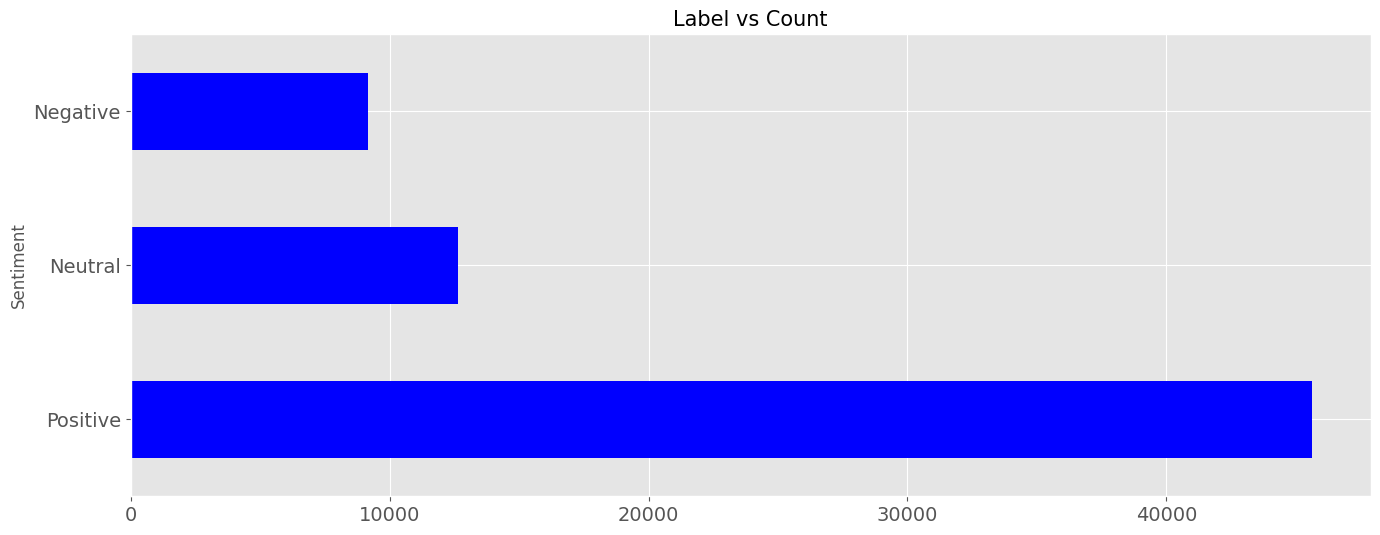

In [66]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = df.Sentiment.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [67]:
import pandas as pd
# Extract separate DataFrames for each sentiment category
neutral_data = df[df['Sentiment'] == 'Neutral']
positive_data = df[df['Sentiment'] == 'Positive']
negative_data = df[df['Sentiment'] == 'Negative']

# Find the minimum count among all sentiment categories
min_count = min(len(neutral_data), len(positive_data), len(negative_data))

# Downsample the positive sentiment data
positive_sampled = positive_data.sample(n=min_count, random_state=42)

# Upsample the neutral and negative sentiment data
neutral_sampled = neutral_data.sample(n=min_count, replace=True, random_state=42)
negative_sampled = negative_data.sample(n=min_count, replace=True, random_state=42)

# Concatenate the balanced data
balanced_data = pd.concat([positive_sampled, neutral_sampled, negative_sampled])

# Shuffle the balanced data
df= balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


# Now you have a balanced data containing equal counts of each sentiment category


In [68]:
df['Sentiment'].value_counts()

Sentiment
Positive    9155
Negative    9155
Neutral     9155
Name: count, dtype: int64

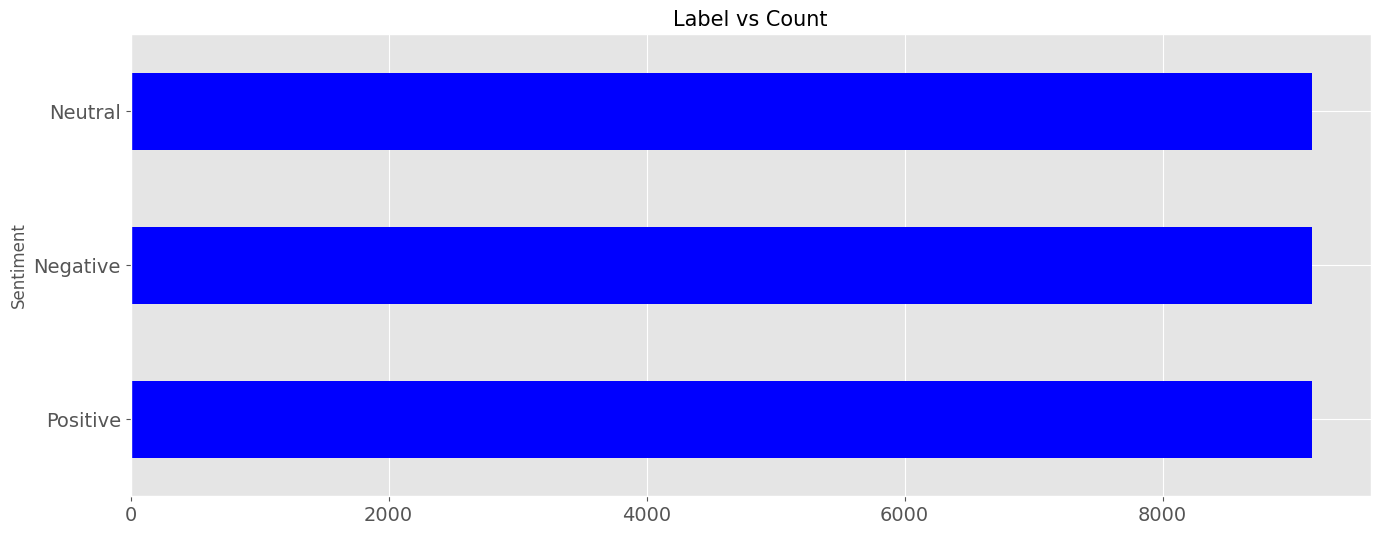

In [69]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = df.Sentiment.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

import pickle

In [71]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

# 
final_stopwords.add("one")
print(final_stopwords)

{'he', 'have', 'ours', 'than', 'themselves', 'further', 'o', 'ma', "you'd", 'doing', 'i', 'as', 'some', 'ourselves', 'against', 'once', 'on', 'so', 'them', "it's", 'but', 'until', 'yourself', 'up', 'here', 'with', 'd', 'weren', 'at', 'between', 'for', 'should', 'yours', 're', 'a', 'when', 'all', 'these', 'then', 'only', 'she', 'does', 'himself', 'having', 'theirs', 'be', 'both', 'few', 't', 'itself', 'just', 'that', 'haven', "you've", 'being', 'was', 'had', 'did', 'will', 'isn', 'their', 'about', 'below', 'each', 'doesn', 'off', 'which', 'who', 'your', 'other', 'out', 'whom', 'its', 'been', 'down', 'to', 'needn', 'the', 'aren', 'hers', 'hadn', 'were', 'they', 'll', 'under', 'our', 'him', 'this', 'most', 'don', 'shan', 'me', 'through', 'has', 'more', 'above', "should've", 'because', 's', 'y', 'myself', "you're", 'am', 'and', 'in', 'why', 'his', 'you', 'too', 'mustn', "she's", 'herself', 'from', 'how', 'won', 'same', 'hasn', 'over', 'where', 'm', 'couldn', 'can', 'while', 'are', 'what', 

In [72]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------

In [73]:
def preprocessor(summary):
    # remove html tags
    summary = HTMLTAGS.sub(r'', summary)

    # remove puncutuation
    summary = summary.translate(table)
    
    # remove digits
    summary = summary.translate(remove_digits)
    
    # lower case all letters
    summary = summary.lower()
    
    # replace multiple white spaces with single space
    summary = MULTIPLE_WHITESPACE.sub(" ", summary).strip()
    
    # remove stop words
    summary = [word for word in summary.split()
              if word not in final_stopwords]
    
    # stemming
    summary = ' '.join([stemmer.stem(word) for word in summary])
    
    return summary

In [74]:
print("Before preprocessing : ")
df.summary.iloc[10]

Before preprocessing : 


'One of the better retail jobs'

In [75]:
# apply preprocessing function

df.summary = df.summary.apply(preprocessor) 
print("After preprocessing : ")
df.summary.iloc[10]

After preprocessing : 


'better retail job'

In [76]:
def generate_wcloud(review):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(review)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

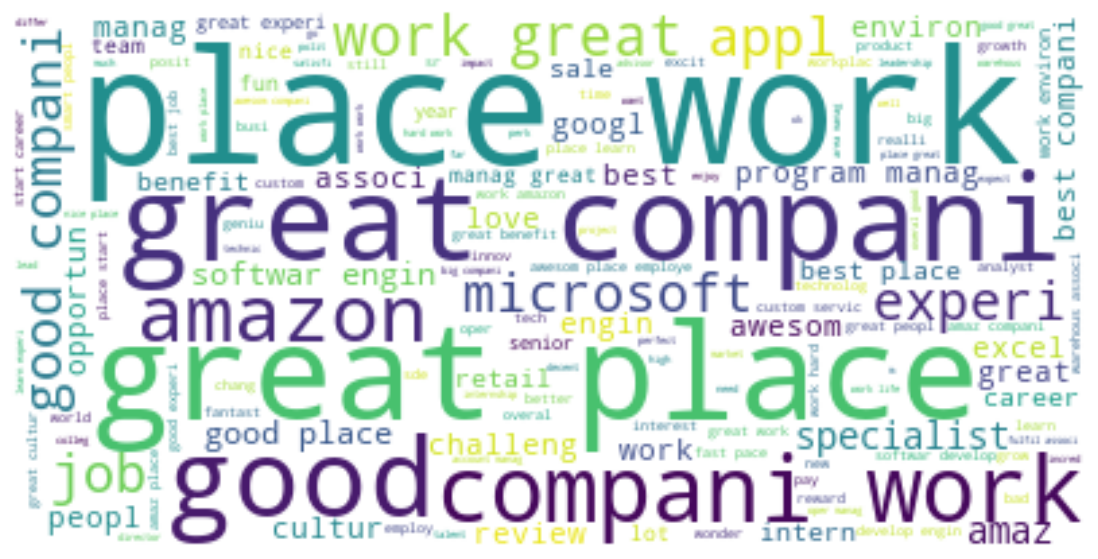

In [77]:
pos = df.loc[df.Sentiment=="Positive"].summary
text = " ".join(summary for summary in pos.astype(str))

generate_wcloud(text)

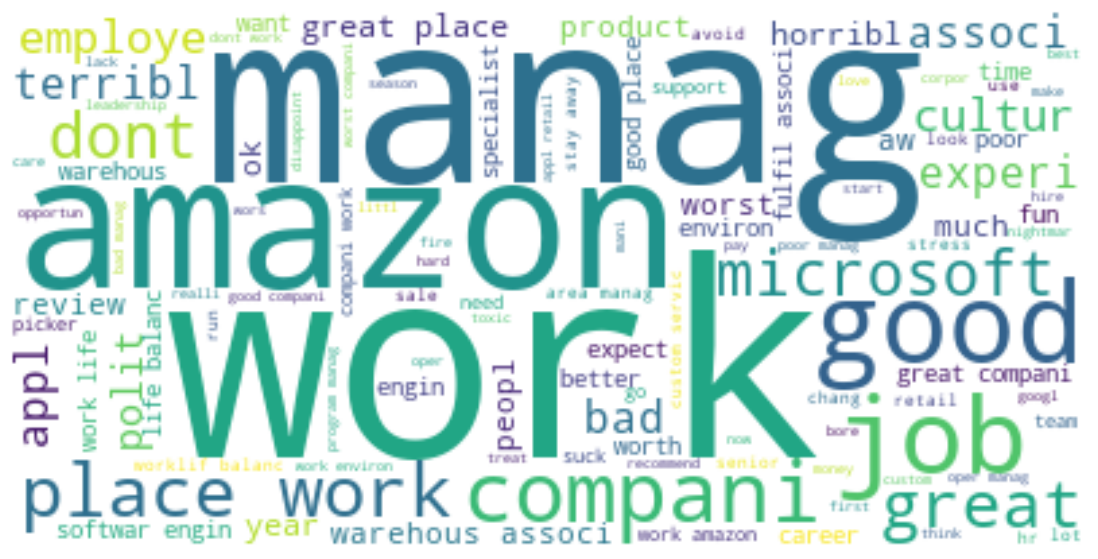

In [78]:
pos = df.loc[df.Sentiment=="Negative"].summary
text = " ".join(summary for summary in pos.astype(str))

generate_wcloud(text)

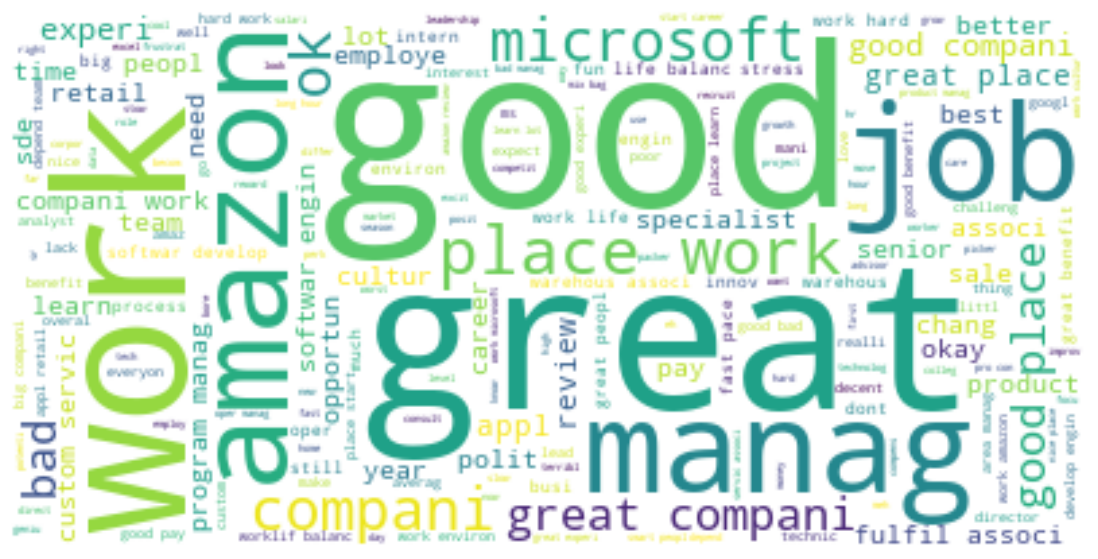

In [79]:
pos = df.loc[df.Sentiment=="Neutral"].summary
text = " ".join(summary for summary in pos.astype(str))

generate_wcloud(text)

### Steps for reviews pre-processing.
* **Remove HTML tags**
     * Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64</_span_>...", we will use get_text() to remove the html tags if there are any.
* **Remove Stop Words**
     * Remove the stopwords like "a", "the", "I" etc.
* **Remove symbols and special characters**
     * We will remove the special characters from our reviews like '#' ,'&' ,'@' etc.
* **Tokenize**
     * We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come"
* **Stemming**
     * Remove the suffixes from the words to get the root form of the word e.g 'Wording' --> "Word"

## Building Model

In [80]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

 we cannot pass raw text features in our model. We have to convert them into numeric values. We will use TfidfVectorizer to convert our reviews in numeric features.

### TfidfVectorizer (Term frequency - Inverse document frequency)
**TF - Term Frequency** :- 

How often a term t occurs in a document d.

TF = (_Number of occurences of a word in document_) / (_Number of words in that document_)

**Inverse  Document Frequency**

IDF = log(Number of sentences / Number of sentence containing word)

**Tf - Idf = Tf * Idf**


In [81]:
X = df.summary
y = df.Sentiment

X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.20, random_state=1, stratify=y)

In [82]:
X_train.shape, X_test.shape

((21972,), (5493,))

In [83]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

In [84]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [85]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Negative', 'Neutral', 'Positive']


In [86]:
### 
from sklearn.metrics import accuracy_score, confusion_matrix
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

In [87]:
# Hyperparameters
from sklearn.linear_model import LogisticRegression
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.463863098488986
Test accuracy score : 0.4620425996723102

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.5342708902239214
Test accuracy score : 0.5195703622792646

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.611414527580557
Test accuracy score : 0.5638084835244858

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.6844620425996724
Test accuracy score : 0.5905698161296196

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.706945202985618
Test accuracy score : 0.5918441653012926

 ----------------------------------------


In [88]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.662251957036228
Test accuracy score : 0.5745494265428728

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.6569269979974514
Test accuracy score : 0.5763699253595486

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.6492353904969962
Test accuracy score : 0.5763699253595486

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.6463681048607318
Test accuracy score : 0.5750955761878754

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.6442290187511378
Test accuracy score : 0.5734571272528672

 ----------------------------------------


In [89]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.4768796650282177
Test accuracy score : 0.4758783906790461

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.5204806116876024
Test accuracy score : 0.51465501547424

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.593801201529219
Test accuracy score : 0.566721281631167

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.672947387584198
Test accuracy score : 0.5878390679046058

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.7038958674676862
Test accuracy score : 0.5900236664846168

 ----------------------------------------


In [90]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.6748133988712908
Test accuracy score : 0.5763699253595486

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.6706717640633534
Test accuracy score : 0.5780083742945568

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.6629801565628982
Test accuracy score : 0.5798288731112324

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.6602038958674676
Test accuracy score : 0.578736573821227

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.6575641725832878
Test accuracy score : 0.5781904241762242

 ----------------------------------------


In [91]:

def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    return plt.show()

In [92]:
bmodel = LogisticRegression(C=c, max_iter=500, random_state=1)
bmodel.fit(bow_X_train, y_train)

LogisticRegression(C=10, max_iter=500, random_state=1)

In [93]:
# predictions
y_preds_train = bmodel.predict(bow_X_train)
y_preds_test = bmodel.predict(bow_X_test)

In [94]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.706945202985618
Test accuracy score : 0.5918441653012926


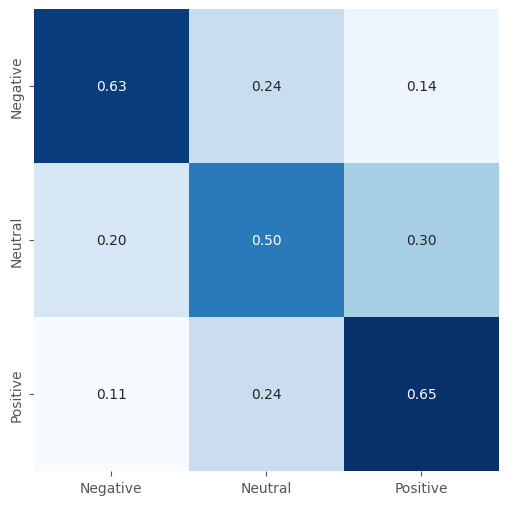

In [95]:
plot_cm(y_test, y_preds_test)

In [96]:
import pickle
with open("transformer.pkl", "wb") as f:
    pickle.dump(bow_vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [97]:
# labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = bow_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [98]:
# positve review
review = "Working at XYZ Company has been an incredible experience. The company culture is supportive and inclusive, with opportunities for growth and development at every turn. Management genuinely cares about the well-being of employees and fosters a collaborative environment where everyone's contributions are valued. Additionally, the benefits package is fantastic, and there's a real sense of pride in the work we do here. I highly recommend XYZ Company to anyone seeking a fulfilling career"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [99]:
review = "the work atmosphere is very bad"
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!


In [100]:
review ="It's neither impressive nor disappointing."
print(f"This is a {get_sentiment(review)} review!")

This is a Neutral review!
